In [1]:
import pymysql
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Emotion data database
mysql = pymysql.connect(
    host='35.201.169.147',
    user='root',
    password='1thefull!',
    db='silverCare'
)

In [3]:
emotion_df = pd.read_sql_query("SELECT b.SORT,\
                                     a.REGISTRATION_DATE,\
       a.PUDDING_SERIALNUM,\
       CASE IFNULL(EMOTION, '')\
                  WHEN '긍정' THEN 1 * EMOTION_SCORE\
                  WHEN '부정' THEN -1 * EMOTION_SCORE\
                  ELSE 0\
                 END AS emotionScore\
 FROM ROJA_HI_LOG a, PUDDING_SERIALNUM b\
 WHERE a.PUDDING_SERIALNUM = b.PUDDING_SERIALNUM\
  AND a.SEND_SORT = 'asr'\
  AND a.SENDER <> 'ROJA'", mysql)

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '93.86%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '62.20%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '99.61%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '77.05%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '92.70%'")
  result = self._query(query)
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Truncated incorrect DOUBLE value: '57.42%'")
  result =

In [6]:
# for user in set(busan_emotion_df.PUDDING_SERIALNUM.values):
class investigate_emotion:
    def __init__(self, region):
        self.region = region
        self.region_emotion_df = emotion_df[emotion_df.SORT == self.region]
        self.user_list = list(set(self.region_emotion_df.PUDDING_SERIALNUM))

    def plotEmotionScore(self, user, period):
        # self.region: Gimpo, busanjin, B2C
        user_specific_data = self.region_emotion_df[self.region_emotion_df.PUDDING_SERIALNUM == user]
        user_specific_data['date'] = user_specific_data.REGISTRATION_DATE.map(lambda x: x.date())
        mean_data = user_specific_data.groupby('date').mean()
        std_data = user_specific_data.groupby('date').std()
        mean_data = mean_data[mean_data.index>datetime(2019, 12, 1).date()]
        std_data = std_data[std_data.index>datetime(2019, 12, 1).date()]
        plt.plot(mean_data.index, mean_data.emotionScore, 'o-', label=user)
        plt.fill_between(mean_data.index, mean_data.emotionScore-std_data.emotionScore,
                         mean_data.emotionScore+std_data.emotionScore, alpha=0.3)
        plt.xticks(mean_data.index[[int((mean_data.index.__len__()-1)/3*i) for i in range(3)]])
        plt.legend()
        
#     def emotionRatio(self, user): # Calculate the ratio of positive/negative ratio (dismiss emotion score)

        
#     def useFrequency(self, user):
        

/Users/sewookoh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sewookoh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


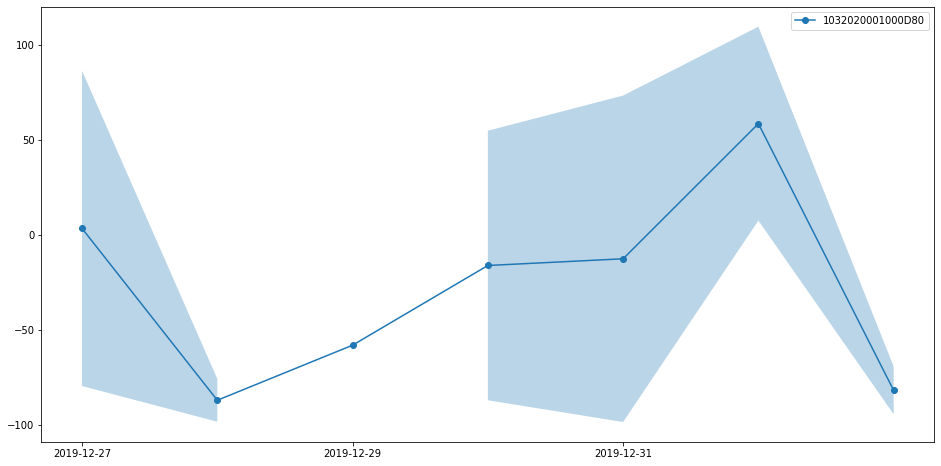

In [7]:
busanjin_emotion = investigate_emotion('busanjin')
plt.figure(figsize=(16, 8))
random_user_plot = busanjin_emotion.plotEmotionScore(list(busanjin_emotion.user_list)[10])

In [8]:
user_specific = busanjin_emotion.region_emotion_df[busanjin_emotion.region_emotion_df.PUDDING_SERIALNUM == busanjin_emotion.user_list[10]]
# test_df


In [22]:
busanjin_emotion.user_list[10]

'1032020001000C59'

In [11]:
.REGISTRATION_DATE.hist()

,SORT,REGISTRATION_DATE,PUDDING_SERIALNUM,emotionScore
22218,busanjin,2019-08-21 14:59:57,103202000100023C,-60.41
22228,busanjin,2019-08-21 15:00:41,103202000100023C,62.73
22232,busanjin,2019-08-21 15:00:54,103202000100023C,96.70
22239,busanjin,2019-08-21 15:01:26,103202000100023C,76.65
22242,busanjin,2019-08-21 15:01:42,103202000100023C,0.00
...,...,...,...,...
301914,busanjin,2020-01-23 14:53:33,1032020001000D6A,87.00
301930,busanjin,2020-01-23 15:08:28,1032020001000D6A,79.00
301954,busanjin,2020-01-23 15:39:59,1032020001000CEB,-99.00
301955,busanjin,2020-01-23 15:40:11,1032020001000CEB,85.00


In [ ]:
plotEmotionScore('B2C')

In [49]:
test_df.groupby(pd.Grouper(key='REGISTRATION_DATE', freq='1D'))

REGISTRATION_DATE
2019-08-21    -7.620392
2019-08-22          NaN
2019-08-23          NaN
2019-08-24          NaN
2019-08-25          NaN
                ...    
2020-01-16          NaN
2020-01-17          NaN
2020-01-18          NaN
2020-01-19          NaN
2020-01-20    28.542857
Freq: D, Name: emotionScore, Length: 153, dtype: float64

# Emotion stat

In [ ]:
busan_emotion_df

# Usage stat

In [39]:
max_num = 0
max_user = 'Hi'
for user in set(busan_emotion_df.SENDER.values):
    if user != 'ROJA':
        temp_num = busan_emotion_df[busan_emotion_df.SENDER == user].shape[0]
        if temp_num > max_num:
            max_num = temp_num
            max_user = user

In [43]:
busan_emotion_df[busan_emotion_df.SENDER == user].EMOTION

55093     긍정
55147     긍정
55153     긍정
55175     부정
55189     긍정
          ..
407849    부정
421277    부정
421279    긍정
421283    긍정
421289    부정
Name: EMOTION, Length: 417, dtype: object